In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, LSTM

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import re

In [4]:
with open('../Data/lastofus.txt', encoding = 'euckr') as f:
      line = f.readlines()

for i in line:
      print(i)

    _____ _   _ _____   _          ____ _____   _____ _____   _   _ ____

   |_   _| | | |  ___| | |    /?\ |  __|_   _| |     |  ___| | | | |  __|

     | | | |_| | |_    | |   /   \| |__  | |   | (?) | |_    | | | | |__

     | | |  _  |  _|   | |  ( (?) )__  | | |   | | | |  _|   | | | |__  |

     | | | | | | |___  | |__|  ?  |__| | | |   | (_) | |     | |_| |__| |

     |_| |_| |_|_____| |____|_|?|_|____| |_|   |_____|_|     |_____|____|

 Game Script by Shotgunnova (P. Summers) / Email: shotgunnova(a+)gmail(d0t)com





   01) Prologue - Hometown ............................................. GS01

   02) Summer - The Quarantine Zone .................................... GS02

   03) Summer - The Outskirts .......................................... GS03

   04) Summer - Bill's Town ............................................ GS04

   05) Summer - Pittsburgh ............................................. GS05

   06) Summer - The Suburbs ............................................ 



Man: Oh, fuck! Go, go, go!



[Joel guns it as the faker's buddies all start shooting.]



Ellie: Jesus. Oh, not good!



[An overturned bus t-bones them.]



Joel: Hold on!



[They crash in a storefront.]



Ellie: I'm okay. I'm okay.



Joel: Then get out quick.



[A hunter comes over and grabs Ellie.]



Hunter: C'mere, you!



Joel: Shit!



Ellie: Let go of me, you chickenshit! Joel!



[Joel kills the hunter who pulls him out of the cab. The other hits Ellie.]



Hunter: I'll show you. I'll show you.



Ellie: Get off of me!



[Joel knocks the would-be strangler off and kills him.]



Ellie: Motherfucker.



Joel: Come on.



Ellie: What's wrong with these guys?



Joel: Catch your breath. We're leaving.



Ellie: 'Kay... Watch out!



[Other foes start shooting.]



Joel: Shit! Stay down!



[Reinforcements arrive soon after.]



Hunter: This motherfucker's dangerous. He killed all of them.



Hunter 2: Shit. Spread out.



Hunter 3: Damn. This tourist got some scrap in him




Hunter: Cover the grounds! Make sure she's not hiding somewhere over here!



[She kills the searchers.]



Ellie: How do I get outta here?



[She finaggles herself into the lodge.]



Ellie: I don't wanna get trapped in here. Agh, where's the way out?



Hunter: She's on this side of the lodge!



[She kills the last pursuers and tries to exit, but David sneakily grabs her.]



David: Relax... Keeping you alive here. There you go. There you go.



[He knocks her out with a sleeper hold. She wakes up later in a cell. There's

 a hunter chopping up a corpse nearby.]



Ellie: Oh...



David: How are you feeling?



[He appears with a dinner tray.]



Ellie: Super.



David: Here. You should eat. I know you're hungry -- been out for quite some

       time. 



Ellie: What is it?



David: It's deer.



Ellie: With some human helping on the side?



David: No. No, I promise. It's...just the deer meat.



Ellie: You're a fucking animal.



[She gobbles down some of the food.]



David

In [10]:
text = ''

array = []
with open('../Data/lastofus.txt', encoding = 'euckr') as f:
    lines = f.readlines()
    text = text.join([i for i in line if re.match(r'^[A-Z].*:', i)])

text    

'Joel: Tommy, I-...Tommy. Tommy, listen to me. He\'s the contractor, okay? I\nSarah: Hey.\nJoel: Scoot.\nSarah: Fun day at work, huh?\nJoel: What are you still doing up? It\'s late.\nSarah: Oh crud. What time is it?\nJoel: It\'s way past your bedtime.\nSarah: But it\'s still today.\nJoel: Honey, please not right now. I do not have the energy for this.\nSarah: Here.\nJoel: What\'s this?\nSarah: Your birthday.\nSarah: You kept complaining about your broken watch... So I figured, you know.\nJoel: Honey, this is...\nSarah: What?\nJoel: It\'s nice, but I-...I think it\'s stuck. It\'s not...\nSarah: What? No, no, no, no.\nSarah: Oh, ha, ha.\nJoel: Where did you get the money for this?\nSarah: Drugs. I sell hardcore drugs.\nJoel: Oh, good. You can start helping out with the mortgage then.\nSarah: Stsh - yeah, you wish.\nJoel: Goodnight, baby girl.\nSarah: Hello?\nTommy: Sarah, honey, I need you to get your daddy on the phone.\nSarah: Uncle Tommy, what time is it?\nTommy: I need to talk to you

In [46]:
print(text)

Joel: Tommy, I-...Tommy. Tommy, listen to me. He's the contractor, okay? I
Sarah: Hey.
Joel: Scoot.
Sarah: Fun day at work, huh?
Joel: What are you still doing up? It's late.
Sarah: Oh crud. What time is it?
Joel: It's way past your bedtime.
Sarah: But it's still today.
Joel: Honey, please not right now. I do not have the energy for this.
Sarah: Here.
Joel: What's this?
Sarah: Your birthday.
Sarah: You kept complaining about your broken watch... So I figured, you know.
Joel: Honey, this is...
Sarah: What?
Joel: It's nice, but I-...I think it's stuck. It's not...
Sarah: What? No, no, no, no.
Sarah: Oh, ha, ha.
Joel: Where did you get the money for this?
Sarah: Drugs. I sell hardcore drugs.
Joel: Oh, good. You can start helping out with the mortgage then.
Sarah: Stsh - yeah, you wish.
Joel: Goodnight, baby girl.
Sarah: Hello?
Tommy: Sarah, honey, I need you to get your daddy on the phone.
Sarah: Uncle Tommy, what time is it?
Tommy: I need to talk to your dad now. There's some--
Sarah: Un

In [47]:
arr = []
for t in text.split('\n'):
    arr.append(t)

In [48]:
tokenizer = Tokenizer(lower = False, filters = '.,?:\"-')
tokenizer.fit_on_texts(arr)

In [49]:
tokenizer.word_index

{'Joel': 1,
 'Ellie': 2,
 'I': 3,
 'you': 4,
 'the': 5,
 'to': 6,
 'it': 7,
 'a': 8,
 'Tess': 9,
 'this': 10,
 'that': 11,
 'You': 12,
 'of': 13,
 'we': 14,
 'Hunter': 15,
 'on': 16,
 'Oh': 17,
 'get': 18,
 'Bill': 19,
 'me': 20,
 'up': 21,
 'here': 22,
 'Tommy': 23,
 'Henry': 24,
 'What': 25,
 'Yeah': 26,
 'Alright': 27,
 'is': 28,
 "I'm": 29,
 'go': 30,
 'your': 31,
 'in': 32,
 'out': 33,
 'just': 34,
 'know': 35,
 'are': 36,
 "It's": 37,
 'do': 38,
 'there': 39,
 '2': 40,
 'be': 41,
 'We': 42,
 'Sam': 43,
 "don't": 44,
 'and': 45,
 'for': 46,
 'got': 47,
 'what': 48,
 'Okay': 49,
 "Let's": 50,
 'David': 51,
 'with': 52,
 'No': 53,
 'gonna': 54,
 'not': 55,
 'all': 56,
 'was': 57,
 'Well': 58,
 'way': 59,
 'back': 60,
 'Hey': 61,
 'see': 62,
 'have': 63,
 'shit': 64,
 'us': 65,
 'like': 66,
 'Man': 67,
 'they': 68,
 'about': 69,
 'good': 70,
 'my': 71,
 'can': 72,
 'Sarah': 73,
 'Marlene': 74,
 'down': 75,
 'How': 76,
 "C'mon": 77,
 'This': 78,
 'think': 79,
 "it's": 80,
 'right': 81

In [50]:
len(tokenizer.word_index)

2750

In [51]:
seq = tokenizer.texts_to_sequences(arr)
seq

[[1, 23, 3, 23, 23, 657, 6, 20, 187, 5, 1372, 89, 3],
 [73, 61],
 [1, 1373],
 [73, 1374, 486, 96, 354, 206],
 [1, 25, 36, 4, 170, 231, 21, 37, 1375],
 [73, 17, 1376, 25, 105, 28, 7],
 [1, 37, 59, 487, 31, 1377],
 [73, 207, 80, 170, 355],
 [1, 787, 658, 55, 81, 101, 3, 38, 55, 63, 5, 1378, 46, 10],
 [73, 113],
 [1, 241, 10],
 [73, 488, 1005],
 [73, 12, 788, 1006, 69, 31, 659, 285, 120, 3, 789, 4, 35],
 [1, 787, 10, 28],
 [73, 25],
 [1, 37, 549, 145, 3, 3, 79, 80, 1007, 37, 55],
 [73, 25, 53, 82, 82, 82],
 [73, 17, 1008, 1008],
 [1, 171, 103, 4, 18, 5, 1379, 46, 10],
 [73, 1380, 3, 790, 1381, 1009],
 [1, 17, 70, 12, 72, 660, 1010, 33, 52, 5, 1382, 172],
 [73, 1383, 286, 4, 489],
 [1, 1384, 221, 188],
 [73, 550],
 [23, 73, 1011, 3, 97, 4, 6, 18, 31, 1385, 16, 5, 1012],
 [73, 661, 23, 48, 105, 28, 7],
 [23, 3, 97, 6, 257, 6, 31, 1386, 101, 136, 86],
 [73, 661, 23, 550],
 [73, 25, 57, 11, 56, 69, 446, 551, 12, 32, 22],
 [662, 152, 1387, 11, 48, 14, 1388, 1389, 173, 1390, 447, 6, 41],
 [73, 

In [52]:
lengths = [len(line) for line in seq]
lengths

[13,
 2,
 2,
 6,
 9,
 7,
 6,
 5,
 14,
 2,
 3,
 3,
 13,
 4,
 2,
 11,
 6,
 4,
 9,
 6,
 12,
 5,
 4,
 2,
 13,
 7,
 11,
 4,
 11,
 13,
 6,
 10,
 3,
 7,
 7,
 5,
 8,
 5,
 8,
 7,
 11,
 4,
 5,
 2,
 6,
 7,
 11,
 10,
 13,
 4,
 3,
 2,
 4,
 3,
 2,
 10,
 4,
 2,
 3,
 4,
 2,
 6,
 16,
 2,
 3,
 2,
 15,
 11,
 9,
 9,
 13,
 6,
 13,
 2,
 8,
 10,
 4,
 2,
 9,
 7,
 6,
 13,
 12,
 6,
 8,
 13,
 2,
 3,
 7,
 16,
 4,
 11,
 5,
 4,
 6,
 5,
 12,
 7,
 5,
 5,
 2,
 6,
 11,
 6,
 4,
 5,
 2,
 4,
 4,
 11,
 5,
 14,
 7,
 8,
 3,
 4,
 3,
 6,
 3,
 10,
 5,
 6,
 5,
 6,
 5,
 3,
 3,
 6,
 8,
 5,
 5,
 4,
 3,
 3,
 4,
 10,
 2,
 11,
 4,
 4,
 3,
 3,
 6,
 4,
 8,
 5,
 5,
 3,
 4,
 6,
 3,
 6,
 4,
 2,
 7,
 3,
 8,
 14,
 2,
 3,
 9,
 6,
 8,
 2,
 5,
 2,
 9,
 3,
 6,
 2,
 6,
 8,
 5,
 12,
 2,
 10,
 4,
 5,
 12,
 6,
 13,
 9,
 12,
 3,
 3,
 3,
 7,
 6,
 15,
 15,
 13,
 11,
 12,
 13,
 15,
 13,
 11,
 13,
 11,
 14,
 3,
 7,
 6,
 9,
 5,
 11,
 8,
 10,
 15,
 15,
 6,
 16,
 3,
 7,
 4,
 8,
 13,
 3,
 14,
 8,
 11,
 5,
 12,
 6,
 6,
 5,
 9,
 6,
 12,
 14,
 8,
 9,
 3,
 2,
 5

(array([  1.,   0.,   0.,   0.,   0., 324.,   0.,   0., 360.,   0.,   0.,
        327.,   0., 396.,   0.,   0., 333.,   0.,   0., 251.,   0.,   0.,
        267.,   0.,   0., 160.,   0., 160.,   0.,   0., 145.,   0.,   0.,
        127.,   0.,   0., 159.,   0., 157.,   0.,   0., 153.,   0.,   0.,
         66.,   0.,   0.,  26.,   0.,   4.]),
 array([ 0.  ,  0.36,  0.72,  1.08,  1.44,  1.8 ,  2.16,  2.52,  2.88,
         3.24,  3.6 ,  3.96,  4.32,  4.68,  5.04,  5.4 ,  5.76,  6.12,
         6.48,  6.84,  7.2 ,  7.56,  7.92,  8.28,  8.64,  9.  ,  9.36,
         9.72, 10.08, 10.44, 10.8 , 11.16, 11.52, 11.88, 12.24, 12.6 ,
        12.96, 13.32, 13.68, 14.04, 14.4 , 14.76, 15.12, 15.48, 15.84,
        16.2 , 16.56, 16.92, 17.28, 17.64, 18.  ]),
 <BarContainer object of 50 artists>)

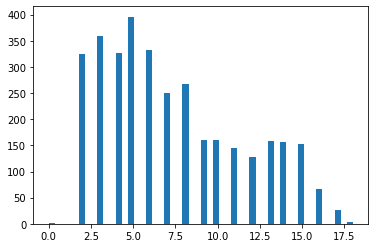

In [53]:
plt.hist(lengths, bins = 50)

In [54]:
seq

[[1, 23, 3, 23, 23, 657, 6, 20, 187, 5, 1372, 89, 3],
 [73, 61],
 [1, 1373],
 [73, 1374, 486, 96, 354, 206],
 [1, 25, 36, 4, 170, 231, 21, 37, 1375],
 [73, 17, 1376, 25, 105, 28, 7],
 [1, 37, 59, 487, 31, 1377],
 [73, 207, 80, 170, 355],
 [1, 787, 658, 55, 81, 101, 3, 38, 55, 63, 5, 1378, 46, 10],
 [73, 113],
 [1, 241, 10],
 [73, 488, 1005],
 [73, 12, 788, 1006, 69, 31, 659, 285, 120, 3, 789, 4, 35],
 [1, 787, 10, 28],
 [73, 25],
 [1, 37, 549, 145, 3, 3, 79, 80, 1007, 37, 55],
 [73, 25, 53, 82, 82, 82],
 [73, 17, 1008, 1008],
 [1, 171, 103, 4, 18, 5, 1379, 46, 10],
 [73, 1380, 3, 790, 1381, 1009],
 [1, 17, 70, 12, 72, 660, 1010, 33, 52, 5, 1382, 172],
 [73, 1383, 286, 4, 489],
 [1, 1384, 221, 188],
 [73, 550],
 [23, 73, 1011, 3, 97, 4, 6, 18, 31, 1385, 16, 5, 1012],
 [73, 661, 23, 48, 105, 28, 7],
 [23, 3, 97, 6, 257, 6, 31, 1386, 101, 136, 86],
 [73, 661, 23, 550],
 [73, 25, 57, 11, 56, 69, 446, 551, 12, 32, 22],
 [662, 152, 1387, 11, 48, 14, 1388, 1389, 173, 1390, 447, 6, 41],
 [73, 

In [55]:
# 앞 문장 입력시 바로 뒷 문장이 예측 되도록 해보자

In [65]:
seq = pad_sequences(seq, maxlen = 12)
seq

array([[  23,    3,   23, ..., 1372,   89,    3],
       [   0,    0,    0, ...,    0,   73,   61],
       [   0,    0,    0, ...,    0,    1, 1373],
       ...,
       [   0,    0,    0, ...,    1,    3,  609],
       [   0,    0,    0, ...,    0,    2,   49],
       [   0,    0,    0, ...,    0,    0,    0]])

In [66]:
x = seq[:-1]
y = seq[1:]

In [67]:
x.shape

(3415, 12)

In [68]:
y.shape

(3415, 12)

In [83]:
x = x.reshape(3415, 12, 1)
y = y.reshape(3415, 12, 1)

In [84]:
from tensorflow.keras.utils import to_categorical

In [85]:
y_oh = to_categorical(y)
y_oh.shape

(3415, 12, 2751)

In [92]:
model = Sequential()
model.add(LSTM(128, input_shape = (12, 1), return_sequences = True))
model.add(LSTM(256, return_sequences = True))
model.add(Dense(2751, activation = 'softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 12, 128)           66560     
                                                                 
 lstm_6 (LSTM)               (None, 12, 256)           394240    
                                                                 
 dense_5 (Dense)             (None, 12, 2751)          707007    
                                                                 
Total params: 1,167,807
Trainable params: 1,167,807
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [94]:
model.fit(x, y_oh, epochs = 20, batch_size = 20)

Epoch 1/20
171/171 [==============================] - 5s 19ms/step - loss: 5.1342 - accuracy: 0.4168
Epoch 2/20
171/171 [==============================] - 3s 19ms/step - loss: 4.2868 - accuracy: 0.4184
Epoch 3/20
171/171 [==============================] - 3s 19ms/step - loss: 4.1332 - accuracy: 0.4184
Epoch 4/20
171/171 [==============================] - 3s 19ms/step - loss: 4.1194 - accuracy: 0.4185
Epoch 5/20
171/171 [==============================] - 3s 19ms/step - loss: 4.0986 - accuracy: 0.4189
Epoch 6/20
171/171 [==============================] - 3s 19ms/step - loss: 4.0869 - accuracy: 0.4198
Epoch 7/20
171/171 [==============================] - 3s 19ms/step - loss: 4.0723 - accuracy: 0.4204
Epoch 8/20
171/171 [==============================] - 3s 19ms/step - loss: 4.0620 - accuracy: 0.4213
Epoch 9/20
171/171 [==============================] - 3s 19ms/step - loss: 4.0487 - accuracy: 0.4213
Epoch 10/20
171/171 [==============================] - 3s 19ms/step - loss: 4.0350 - accura

In [95]:
pred = model.predict(x[7:8])
pred

array([[[8.0863863e-01, 8.1735048e-03, 9.9133179e-03, ...,
         2.0516858e-07, 3.1638637e-04, 2.9863052e-08],
        [7.6812369e-01, 1.1577893e-02, 9.9411123e-03, ...,
         3.3539571e-08, 1.9649200e-05, 2.4856176e-08],
        [7.2872424e-01, 1.3249677e-02, 1.0994030e-02, ...,
         1.5347963e-08, 8.3804916e-06, 4.1312623e-07],
        ...,
        [8.9580357e-02, 3.8925946e-02, 2.9435445e-02, ...,
         9.9279781e-08, 3.4164291e-06, 1.6116375e-05],
        [2.4934730e-02, 3.2230094e-02, 2.4070289e-02, ...,
         2.3523064e-07, 3.4243769e-06, 4.8105248e-06],
        [4.5541553e-03, 1.2743311e-02, 1.1376253e-02, ...,
         5.9067600e-07, 2.8901861e-06, 1.0280834e-06]]], dtype=float32)

In [96]:
pred.shape

(1, 12, 2751)

In [109]:
pred_tok = np.argmax(pred, axis = 2)

In [110]:
tokenizer.word_index

{'Joel': 1,
 'Ellie': 2,
 'I': 3,
 'you': 4,
 'the': 5,
 'to': 6,
 'it': 7,
 'a': 8,
 'Tess': 9,
 'this': 10,
 'that': 11,
 'You': 12,
 'of': 13,
 'we': 14,
 'Hunter': 15,
 'on': 16,
 'Oh': 17,
 'get': 18,
 'Bill': 19,
 'me': 20,
 'up': 21,
 'here': 22,
 'Tommy': 23,
 'Henry': 24,
 'What': 25,
 'Yeah': 26,
 'Alright': 27,
 'is': 28,
 "I'm": 29,
 'go': 30,
 'your': 31,
 'in': 32,
 'out': 33,
 'just': 34,
 'know': 35,
 'are': 36,
 "It's": 37,
 'do': 38,
 'there': 39,
 '2': 40,
 'be': 41,
 'We': 42,
 'Sam': 43,
 "don't": 44,
 'and': 45,
 'for': 46,
 'got': 47,
 'what': 48,
 'Okay': 49,
 "Let's": 50,
 'David': 51,
 'with': 52,
 'No': 53,
 'gonna': 54,
 'not': 55,
 'all': 56,
 'was': 57,
 'Well': 58,
 'way': 59,
 'back': 60,
 'Hey': 61,
 'see': 62,
 'have': 63,
 'shit': 64,
 'us': 65,
 'like': 66,
 'Man': 67,
 'they': 68,
 'about': 69,
 'good': 70,
 'my': 71,
 'can': 72,
 'Sarah': 73,
 'Marlene': 74,
 'down': 75,
 'How': 76,
 "C'mon": 77,
 'This': 78,
 'think': 79,
 "it's": 80,
 'right': 81

In [111]:
idx_word = {}

for w in tokenizer.word_index:
    idx_word[tokenizer.word_index[w]] = w

idx_word

{1: 'Joel',
 2: 'Ellie',
 3: 'I',
 4: 'you',
 5: 'the',
 6: 'to',
 7: 'it',
 8: 'a',
 9: 'Tess',
 10: 'this',
 11: 'that',
 12: 'You',
 13: 'of',
 14: 'we',
 15: 'Hunter',
 16: 'on',
 17: 'Oh',
 18: 'get',
 19: 'Bill',
 20: 'me',
 21: 'up',
 22: 'here',
 23: 'Tommy',
 24: 'Henry',
 25: 'What',
 26: 'Yeah',
 27: 'Alright',
 28: 'is',
 29: "I'm",
 30: 'go',
 31: 'your',
 32: 'in',
 33: 'out',
 34: 'just',
 35: 'know',
 36: 'are',
 37: "It's",
 38: 'do',
 39: 'there',
 40: '2',
 41: 'be',
 42: 'We',
 43: 'Sam',
 44: "don't",
 45: 'and',
 46: 'for',
 47: 'got',
 48: 'what',
 49: 'Okay',
 50: "Let's",
 51: 'David',
 52: 'with',
 53: 'No',
 54: 'gonna',
 55: 'not',
 56: 'all',
 57: 'was',
 58: 'Well',
 59: 'way',
 60: 'back',
 61: 'Hey',
 62: 'see',
 63: 'have',
 64: 'shit',
 65: 'us',
 66: 'like',
 67: 'Man',
 68: 'they',
 69: 'about',
 70: 'good',
 71: 'my',
 72: 'can',
 73: 'Sarah',
 74: 'Marlene',
 75: 'down',
 76: 'How',
 77: "C'mon",
 78: 'This',
 79: 'think',
 80: "it's",
 81: 'right'

In [113]:
temp = ''

for l in pred_tok:
    for w in l:
        if w != 0:
            temp += idx_word[w]
            temp +=' '

temp

'Joel it '

In [114]:
input_txt = [ t[0] for t in x[7:8][0]]

temp = ''

for t in input_txt:
    if t != 0:
        temp += idx_word[t]
        temp +=' '

temp

"Sarah But it's still today "